In [1]:
## Import the necessary packages

import numpy as np
import random
import math
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, cm
from matplotlib import colors
from ipywidgets import *


# Simulated Annealing

In [2]:
class route:
    
    '''Declare a class which will generate a (pseudo) random configuration of cities.
       N controlls the number of cities, width and height is the width and height of the map.
       We can set a seed in order to generate the same configuration over and over again.'''
    
    def __init__(self, N, width, height, seed = None):
        np.random.seed(seed)   # set the seed
        self.width = width     # set the width/height of the map
        self.height = height
        self.N = N
        self.x = np.random.uniform(-self.width, self.width, N)  # generate and store the x coordinates of the cities
        self.y = np.random.uniform(-self.width, self.width, N)  # generate and store the y coordinates of the cities
        
        
    '''Plot function in order to get visual representation of the city configuration.'''
        
    def plot_route(self):
        plt.figure(figsize = (10,6))     # set figure size
        plt.plot(self.x, self.y, c = 'navy', label = 'path' )                  # plotting the path
        plt.plot([self.x[0], self.x[-1]], [self.y[0], self.y[-1]], c = 'navy') # TSP is defined as the salesperson would
                                                                               # like to get back to the original city
                                                                               # here I'm just closing the route on the plot
        plt.plot(self.x, self.y, ls = '', marker = 'o', ms = 10, mfc='red', label = 'city')  # red circles for the cities
        plt.legend(fontsize = 15)   # adding legend
        plt.grid(ls='--')

    '''Calculate the total travelled distance'''
        
    def dist(self):
        
        city_pos = [] # getting the positions of the cities
        for i in zip(self.x, self.y):    # going over the cities and saving the positions of the cities
            city_pos.append(np.array(i))
            
        dist = 0 # initial distance travelled
        for i in range(len(city_pos)):   # going over all of the cities and adding together the distances
            dist = dist + math.dist(city_pos[i-1], city_pos[i]) # math.dist() calculates Euclidean distance between
                                                                # 2 points, the reason for the indexing is that
                                                                # we would like to get back to the original city
        return dist  # return to total distance travelled
    
    '''swap_random() proposes new states for the Simulated Annealing by
       changing the order of visitation of the cities'''
    
    def swap_random(self):
        N = range(len(self.x))
        i1, i2 = random.sample(N, 2)   # sample 2 cities
        self.x[i1], self.x[i2] = self.x[i2], self.x[i1]  # change the coordinates of the 2 sampled cities
        self.y[i1], self.y[i2] = self.y[i2], self.y[i1]
        
        return self # return the new state
        

In [3]:
'''Simulated Annealing. Parameters are 
   - N: controlls the number of cities on the map
   - width/height: controlls the width/height of the map
   - T_0: initial temperature
   - alpha: cooling rate
   - seed: we can set a seed in order the get the same configuration of cities'''

def SA(N = 20, T_0 = 1000, alpha = 0.99, width = 10, height = 10, seed = None):

    T = T_0               # initial guess for T
    maxiter_outer = 1500  # setting a cooling schedule
    maxiter_inner = 10
    
    r = route(N, width, height, seed) # create an initial configuration
    initial_r = r  # save initial configuration separately (for visualization purposes)
    E = r.dist()   # calculate the cost of the initial config
    best_E = E     # set the currently best/lowest cost
    best_r = r     # set the currently best visiting order

    routes = []    # save the routes
    E_vec = []     # save the costs
    Ts = []        # save the temperatures
    ps = []        # save the acceptance probabilites
    total_dist = []  # save the total traveled distances
    
    for i in range(0,maxiter_outer):     # cooling schedule
        
        for j in range(0,maxiter_inner):
            
            r_new = deepcopy(r)  # create a copy of the current route
            r_new.swap_random()  # propose new sate
            E_new = r_new.dist() # calculate the cost of the route
    
            dE = E_new - E    # calculate the difference in the cost
            
            if E_new <= E:     # if we decreased the cost we accept the propesed state
                r = r_new      # update
                E = E_new
                ps.append(1)
            else:
                prob = np.exp(-dE/T) # calculate acceptance probability
                ps.append(prob)
                if np.random.uniform(0,1) <= prob: # we accept the propesed state with given probability
                    r = r_new                      # update
                    E = E_new
            
            if E < best_E:   # update the best route so far
                best_E = E
                best_r = r
                
            total_dist.append(r.dist())  # save the traveled distance, route and cost
            routes.append(r)
            E_vec.append(E)
        
        T = T * alpha  # update the temperature
        Ts.append(T)   # save temperature
                
    return initial_r, best_r, Ts, ps, total_dist


In [4]:
initial_r, best_r, Ts, ps, total_dist = SA(seed=42)  # Do Simulated Annealing

Text(0.5, 1.0, 'Best Guess - Travel distance: 83.104')

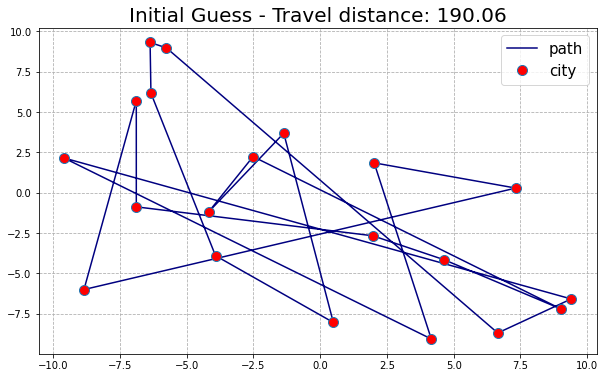

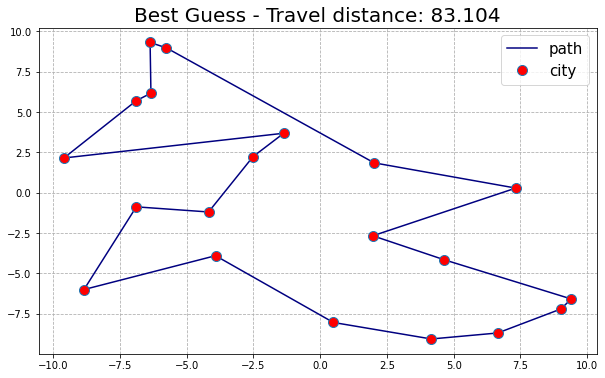

In [5]:
# show the the initial guess and best guess

initial_r.plot_route()
plt.title('Initial Guess - Travel distance: ' + str(np.round(initial_r.dist(), 3)), fontsize = 20)

best_r.plot_route()
plt.title('Best Guess - Travel distance: ' + str(np.round(best_r.dist(), 3)), fontsize = 20)

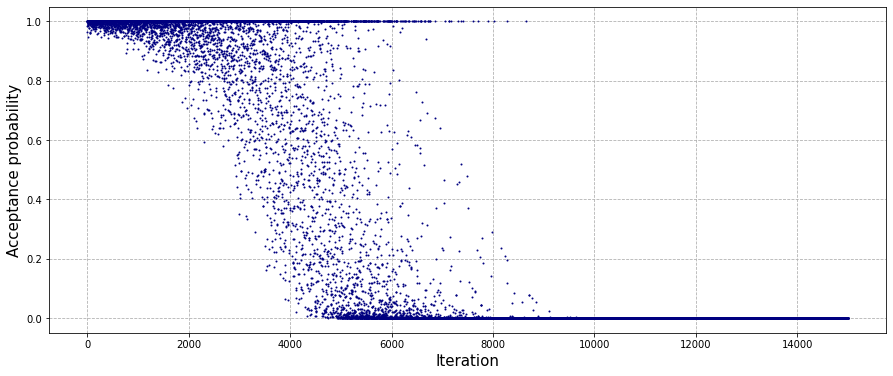

In [6]:
# show the acceptance probabilities, and formatting the plot

plt.figure(figsize=(15,6))
plt.plot(ps, ls='', marker = 'o', ms=1, c = 'navy')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Acceptance probability', fontsize = 15)
plt.grid(ls='--')

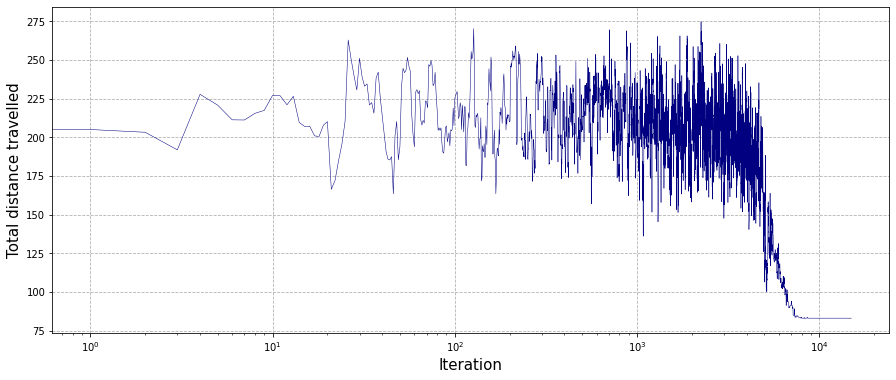

In [7]:
# show the total travelled distance, and formatting the plot

plt.figure(figsize=(15,6))
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Total distance travelled', fontsize = 15)
plt.plot(total_dist, c = 'navy', lw = 0.5)
plt.grid(ls='--')
plt.xscale('log')

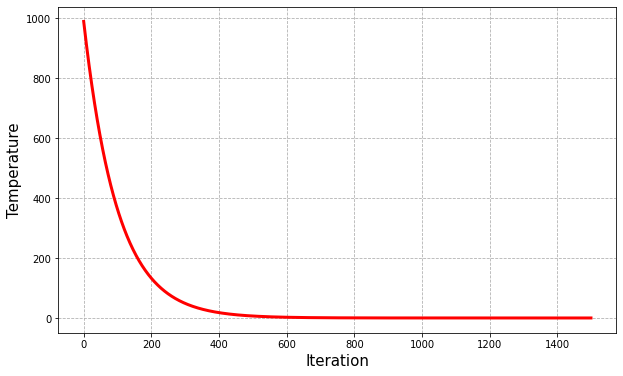

In [8]:
# show the cooling process, and formatting the plot

plt.figure(figsize=(10,6))
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(Ts, c = 'red', lw = 3)
plt.grid(ls='--')
#plt.yscale('log')
#plt.xscale('log')

In [9]:
# with this intercative plot we can play around with the hyperparameters, we can get a feeling
# about which parameter settings are working which are not

def interact_plot_SA(N, T_0, alpha):
    initial_r, best_r, Ts, ps, total_dist = SA(N, T_0, alpha, width = 10, height = 10, seed=42)
    initial_r.plot_route()
    plt.title('Initial Guess - Travel distance: ' + str(np.round(initial_r.dist(), 3)), fontsize = 20)

    best_r.plot_route()
    plt.title('Best Guess - Travel distance: ' + str(np.round(best_r.dist(), 3)), fontsize = 20)
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(total_dist, c = 'navy', lw = 0.5)
    plt.xlabel('Iteration', fontsize = 15)
    plt.ylabel('Total distance travelled', fontsize = 15)
    plt.grid(ls='--')
    plt.xscale('log')
        
interact(interact_plot_SA, N=(5,30,1), T_0 = (100, 1000, 100), alpha = (0.5, 0.99, 0.01))

interactive(children=(IntSlider(value=17, description='N', max=30, min=5), IntSlider(value=500, description='T…

<function __main__.interact_plot_SA(N, T_0, alpha)>

# Ant Colony Optimization




Some parts of the code is based on this [source](https://induraj2020.medium.com/implementation-of-ant-colony-optimization-using-python-solve-traveling-salesman-problem-9c14d3114475), but I made some corrections/modifications to it according to my opinion and this [article](https://www.hilarispublisher.com/open-access/solving-traveling-salesmen-problem-using-ant-colony-optimizationalgorithm-2168-9679-1000260.pdf).



In [10]:
def total_dist(city_pos):                      # given the position of cities calculate the total travelled distance
    dist = 0                                   # initial distance
    for i in range(len(city_pos)):             # going over the cities and add together the length of the edges
        dist = dist + math.dist(city_pos[i-1], city_pos[i])
    return dist                                # return the total distance

class ant_route:
    
    '''Create a class for the Ant colony optimizations. The parameteres to give are:
       - points: configuration of the cities
       - n_ants: number of ants simulated
       - n_iterations: number of iterations
       - alpha/beta/evaporation rate/Q: hyperparameters of the problem'''
    
    def __init__(self, points, n_ants=30, n_iterations=200, alpha=1.5, beta=1, evaporation_rate=0.8, Q=1):
        self.N = len(points)    # get the number of cities
        self.points = points    # get the positions of the cities
        self.pheromone = np.ones((self.N, self.N)) - np.eye(self.N) # initialize starting pheromone distribution
                                                                    # and set diagonal elements to zero in order
                                                                    # to avoid self refence (see the article referenced)
        self.best_path = None                      # current best path
        self.best_path_length = np.inf             # current path length (set to be very high)
        self.n_ants = n_ants                       # number of ants
        self.n_iterations = n_iterations           # number of iterations
        self.alpha = alpha                         # model hyperparameters
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.Q = Q
        
    def AntColonyOpt(self):
    
        for iteration in range(self.n_iterations):      # going over the iterations
            paths = []                                  # save the paths and the lengths of the paths
            path_lengths = []
        
            for ant in range(self.n_ants):                 # going over each ant
                visited = [False]*self.N                   # initially an ant did not visit any cities
                current_point = np.random.randint(self.N)  # initialize the ant on a randomly chosen city
                visited[current_point] = True              # set the status of starting city to 'visited'
                path = [current_point]                     # set the starting point of the route
                path_length = 0                            # initialize path length
            
                while False in visited:                                # going over each unvisited city
                    unvisited = np.where(np.logical_not(visited))[0]   # get the unvisited cities
                    probabilities = np.zeros(len(unvisited))           # initialize probabilities
                
                    for i, unvisited_point in enumerate(unvisited):
                        
                        # calculate probabilites based on the formula in the refered article
                        
                        probabilities[i] = self.pheromone[current_point, unvisited_point]**self.alpha /\
                                           math.dist(self.points[current_point], self.points[unvisited_point])**self.beta
                    
                    numer = probabilities
                    denom = np.sum(probabilities)
                    probabilities = numer / denom
                
                    next_point = np.random.choice(unvisited, p=probabilities) # pick the next city weighted with the
                                                                              # visiting probabilites
                    path.append(next_point)       # save the new city in path
                    path_length = path_length + math.dist(self.points[current_point], self.points[next_point]) # calculate total travelled distance
                    visited[next_point] = True    # set the status of the newly visited city to 'True'
                    current_point = next_point    # set current location of ant
            
                paths.append(path)                # save path
                path_lengths.append(path_length)  # save path lenght
            
                if path_length < self.best_path_length:   # update current best path and length of the best path
                    self.best_path = path
                    self.best_path_length = path_length
        
            ## upadte pheromone level (evaporation)
            self.pheromone =  self.pheromone * self.evaporation_rate
            for path, path_length in zip(paths, path_lengths):
                for i in range(self.N):
                    self.pheromone[path[i-1], path[i]] = self.pheromone[path[i-1], path[i]] + self.Q/path_length # fromula from article
            
        return self.best_path, self.pheromone


In [11]:
np.random.seed(42)
N = 20
city_pos = np.vstack((np.random.uniform(-10, 10, N), np.random.uniform(-10, 10, N))).T  # create a configuration of cities
                                                                                        # (same as with SA)
intial_path = ant_route(city_pos)

best_path, pheromone = intial_path.AntColonyOpt()  # Do ant colony optimization

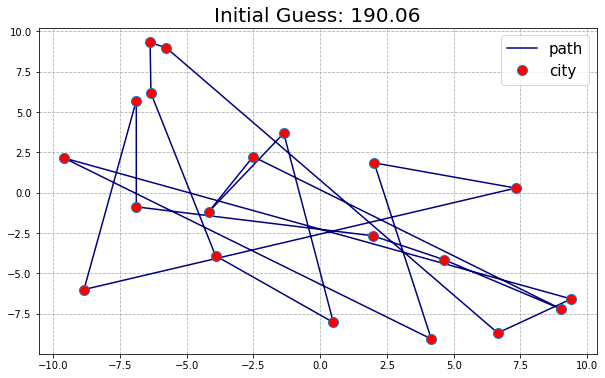

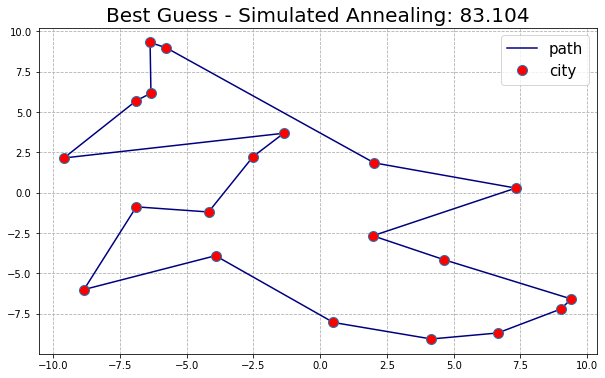

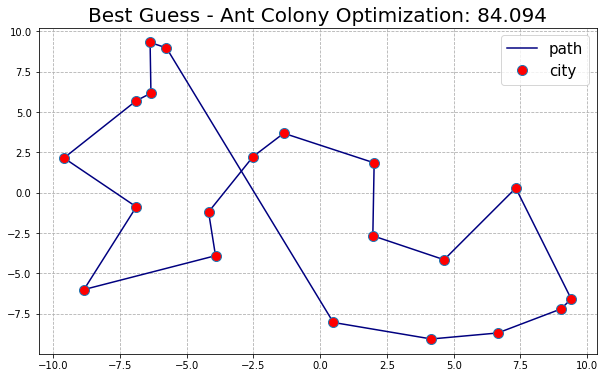

In [12]:
# show the initial route and the optimized route with simulated annealing and ant colony optimization

initial_r.plot_route()
plt.title('Initial Guess: ' + str(np.round(initial_r.dist(), 3)), fontsize = 20)

best_r.plot_route()
plt.title('Best Guess - Simulated Annealing: ' + str(np.round(best_r.dist(), 3)), fontsize = 20)

plt.figure(figsize = (10,6))
plt.title('Best Guess - Ant Colony Optimization: ' + str(np.round(total_dist(city_pos[best_path]), 3)), fontsize = 20)
plt.plot(city_pos[best_path][:,0], city_pos[best_path][:,1], c = 'navy', label = 'path')
plt.plot([city_pos[best_path][:,0][0], city_pos[best_path][:,0][-1]], 
         [city_pos[best_path][:,1][0], city_pos[best_path][:,1][-1]],  c = 'navy')
plt.plot(city_pos[best_path][:,0], city_pos[best_path][:,1], ls = '', marker = 'o', ms = 10, mfc='red', label = 'city')
plt.legend(fontsize = 15)
plt.grid(ls='--')

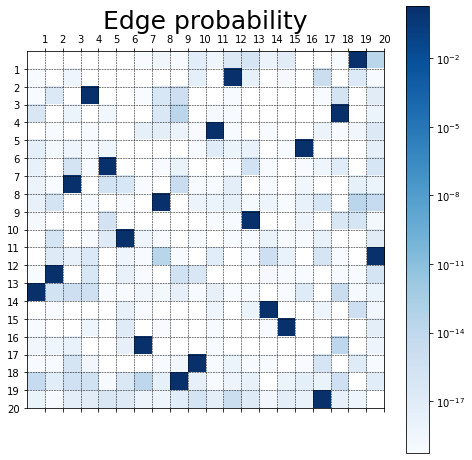

In [13]:
plt.figure(figsize=(8,8))

plt.matshow(pheromone, cmap=plt.cm.Blues, norm=colors.LogNorm(), fignum=1)  # show the probabilites of picking an
                                                                            # edge from city i to city j
plt.title('Edge probability', fontsize = 25)
plt.colorbar()

ax = plt.gca()                                  # make a neat plot
ax.set_xticks(np.arange(0.5, N, 1))
ax.set_yticks(np.arange(0.5, N, 1))
ax.set_xticklabels(np.arange(1, N+1, 1))
ax.set_yticklabels(np.arange(1, N+1, 1))
ax.grid(color='black', linestyle='--', linewidth=0.5)

In [14]:
# with this intercative plot we can play around with the hyperparameters, we can get a feeling
# about which parameter settings are working which are not

def interact_plot_ACO(N, n_ants, n_iterations, alpha, beta, evaporation_rate):
    np.random.seed(42)
    city_pos = np.vstack((np.random.uniform(-10, 10, N), np.random.uniform(-10, 10, N))).T  
    intial_path = ant_route(city_pos, n_ants, n_iterations, alpha, beta, evaporation_rate)
    best_path, pheromone = intial_path.AntColonyOpt()
    
    plt.figure(figsize = (10,6))
    plt.title('Initial Guess: ' + str(np.round(total_dist(city_pos), 3)), fontsize = 20)
    plt.plot(city_pos[:,0], city_pos[:,1], c = 'navy', label = 'path')
    plt.plot([city_pos[:,0][0], city_pos[:,0][-1]], 
         [city_pos[:,1][0], city_pos[:,1][-1]],  c = 'navy')
    plt.plot(city_pos[:,0], city_pos[:,1], ls = '', marker = 'o', ms = 10, mfc='red', label = 'city')
    plt.legend(fontsize = 15)
    plt.grid(ls='--')

    plt.figure(figsize = (10,6))
    plt.title('Best Guess - Ant Colony Optimization: ' + str(np.round(total_dist(city_pos[best_path]), 3)), fontsize = 20)
    plt.plot(city_pos[best_path][:,0], city_pos[best_path][:,1], c = 'navy', label = 'path')
    plt.plot([city_pos[best_path][:,0][0], city_pos[best_path][:,0][-1]], 
         [city_pos[best_path][:,1][0], city_pos[best_path][:,1][-1]],  c = 'navy')
    plt.plot(city_pos[best_path][:,0], city_pos[best_path][:,1], ls = '', marker = 'o', ms = 10, mfc='red', label = 'city')
    plt.legend(fontsize = 15)
    plt.grid(ls='--')
        
interact(interact_plot_ACO, N = (5,30,5), n_ants=(10,30,5), n_iterations = (50, 200, 50), alpha = (0.5, 1.5, 0.1),
        beta = (0.5, 1.5, 0.1), evaporation_rate = (0.2, 0.95, 0.05))

interactive(children=(IntSlider(value=15, description='N', max=30, min=5, step=5), IntSlider(value=20, descrip…

<function __main__.interact_plot_ACO(N, n_ants, n_iterations, alpha, beta, evaporation_rate)>

# Comparing the methods

In [15]:
N = 20
seeds = [11, 22, 33, 44, 55, 66, 77, 88, 99, 1010, 1111, 1212, 1313, 1414, 1515]   # set a list of seeds
                                                                                   # I do this in order to make the model
                                                                                   # comparisons on the same configurations

SA_tot_dists = []         # simulated annealing total distance
ACO_tot_dists = []        # ant colony optimization total distance
initial_guess_dist = []   # initial guess


for seed in seeds:    # going over the seeds (get the city configurations)
    
    initial_r, SA_best_r, Ts, ps, SA_total_dist = SA(N, seed = seed) # do simulated annealing
    
    intial_path = ant_route(np.vstack((initial_r.x, initial_r.y)).T)  # get the configuration from simulated annealing
                                                                      # and use it for ant colony
    best_path, pheromone = intial_path.AntColonyOpt()                 # do ant colony optimization
    ACO_total_dist = total_dist(np.vstack((initial_r.x, initial_r.y)).T[best_path])   # calculate distance
    
    
    # save results
    SA_tot_dists.append(SA_best_r.dist())
    ACO_tot_dists.append(ACO_total_dist)
    initial_guess_dist.append(total_dist(np.vstack((initial_r.x, initial_r.y)).T))

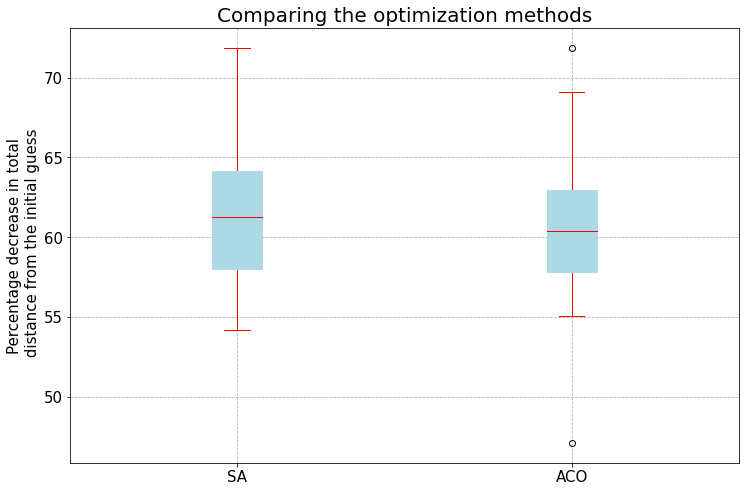

In [16]:
# calculate the reduction in distance with SA and with ACO
SA_d = (np.array(initial_guess_dist) - np.array(SA_tot_dists)) / np.array(initial_guess_dist) * 100
ACO_d = (np.array(initial_guess_dist) - np.array(ACO_tot_dists)) / np.array(initial_guess_dist) * 100
data = pd.DataFrame({"SA": SA_d, "ACO": ACO_d})   # save results in dataframe


# make a neat boxplot with the results
props = dict(boxes="lightblue", medians="red", whiskers="red", caps="red")
plot = data[['SA', 'ACO']].plot.box(color = props, patch_artist=True, fontsize = 15, figsize = (12, 8))
plt.title('Comparing the optimization methods', fontsize = 20)
plt.ylabel('Percentage decrease in total\n distance from the initial guess', fontsize = 15)
plt.grid(ls='--')



In [17]:
print('Mean reduction with SA:', np.round(data['SA'].mean(), 2))
print('Standard deviation of reduction with SA:', np.round(data['SA'].std(), 2))
print('\n')
print('Mean reduction with ACO:', np.round(data['ACO'].mean(), 2))
print('Standard deviation of reduction with ACO:', np.round(data['ACO'].std(), 2))



Mean reduction with SA: 61.27
Standard deviation of reduction with SA: 4.88


Mean reduction with ACO: 60.5
Standard deviation of reduction with ACO: 5.9
